In [26]:
import mdtraj as md
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as la
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt



In [48]:
t_capture = np.sort(np.array([0.08,0.548,0.407,0.837,3.427,1.363,0.819,0.141,2.657,0.155]))

In [49]:
np.max(t_capture*4)

13.708

In [50]:

t = np.linspace(0,t_capture[-1],1001)
survival = np.zeros(len(t))
for i in range(len(t)):
    survival[i] = np.sum(t_capture > t[i]) / len(t_capture)
t_fit = np.append([0.0], t_capture) *4
survival_fit = np.linspace(1,0,len(t_fit))
t_fit_martini = t_fit * 4.0
params, confint = curve_fit(lambda t,b: np.exp(-t*b),  t_fit, survival_fit)

In [51]:
1/params[0]

2.8762312456618333

In [52]:
survival_log = np.log(survival_fit[:-1])
t_fit_2 = t_fit[:-1]
params2, confint2 = curve_fit(lambda t,b: t*b,  t_fit_2, survival_log)

In [53]:
1/params2[0]

-4.0148282623521805

In [54]:
plt.rcParams['font.family'] = "Helvetica"
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 2

[]

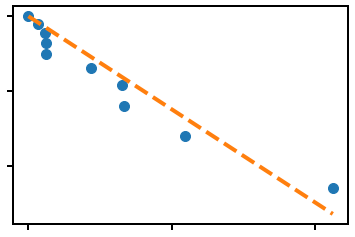

In [55]:
plt.plot(t_fit_2, survival_log, 'o', ms=10)
plt.plot([0,np.max(t_fit_2)],[0,np.max(t_fit_2)*params2[0]], '--', lw=4)


plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

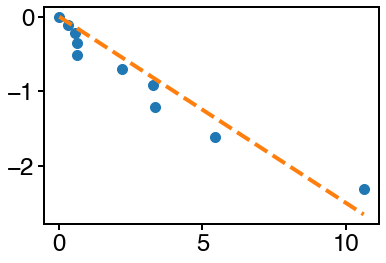

In [56]:
plt.plot(t_fit_2, survival_log, 'o', ms=10)
plt.plot([0,np.max(t_fit_2)],[0,np.max(t_fit_2)*params2[0]], '--', lw=4)
#plt.gca().set_xticklabels([])
#plt.gca().set_yticklabels([])

Text(0, 0.5, 'unbound probability')

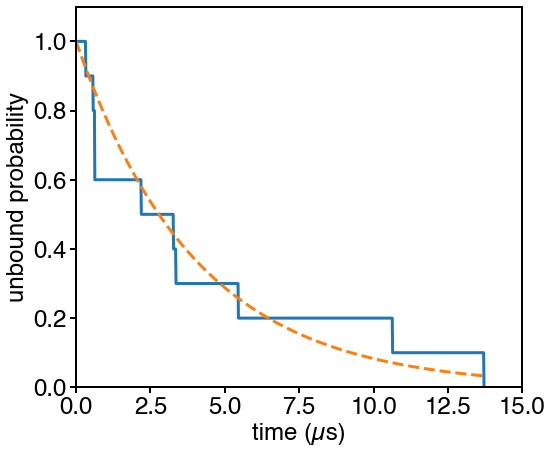

In [57]:
plt.figure(figsize=(8,7))
plt.plot(t*4,survival, lw=3)
plt.plot(t*4,np.exp(t*4*params2[0]),'--', lw=3)
plt.xlim([0,15])
plt.ylim([0,1.1])
plt.xlabel('time (µs)')
plt.ylabel('unbound probability')

In [37]:
from scipy.stats.distributions import t as student_t

alpha = 0.05 # 95% confidence interval = 100*(1-alpha)

n = len(t_fit_2)    # number of data points
p = len(params2) # number of parameters

dof = max(0, n - p) # number of degrees of freedom

# student-t value for the dof and confidence level
tval = student_t.ppf(1.0-alpha/2., dof) 

1/2*(1/(-params2[0] + np.sqrt((np.diag(confint2))[0])*tval) -  1/(-params2[0] - np.sqrt((np.diag(confint2))[0])*tval))

-0.8026620172742382